<br><br><br>

### **문장 내 관계 추출**

문장의 단어(Entity)에 대한 속성과 관계를 예측하는 것이 목표입니다.

- 목표

    - 문장, 단어에 대한 정보를 통해, 문장 속에서 단어 사이의 관계를 추출하는 것이다.


In [1]:
import pandas as pd
from typing import *
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('dataset/train/train.csv')

In [4]:
df.head(5)

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26...","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx':...",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': ...","{'word': '대안신당', 'start_idx': 14, 'end_idx': 1...",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 2...","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx...",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': ...","{'word': '박정부', 'start_idx': 22, 'end_idx': 24...",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_id...","{'word': '1967', 'start_idx': 0, 'end_idx': 3,...",no_relation,wikipedia


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32470 entries, 0 to 32469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              32470 non-null  int64 
 1   sentence        32470 non-null  object
 2   subject_entity  32470 non-null  object
 3   object_entity   32470 non-null  object
 4   label           32470 non-null  object
 5   source          32470 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.5+ MB


<br><br><br>

In [6]:
subject_entity = df['subject_entity'][:5].to_list()
subject_entity

["{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}",
 "{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}",
 "{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}",
 "{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}",
 "{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}"]

In [7]:
object_entity = df['object_entity'][:5].to_list()
object_entity

["{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",
 "{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",
 "{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",
 "{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",
 "{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}"]

In [8]:
subject_entity[3][1:-1].split(',')[0].split(':')[1].strip()[1:-1]

'아성다이소'

In [9]:
subject_entity[3][1:-1].split(',')[-1].split(':')[1].strip()[1:-1]

'ORG'

<br><br><br>

In [10]:
split_func = lambda string, x: string[1:-1].split(',')[x].split(':')[1].strip()[1:-1]

In [11]:
split_func(subject_entity[3], 0), split_func(subject_entity[3], -1)

('아성다이소', 'ORG')

In [12]:
split_func(object_entity[3], 0), split_func(object_entity[3], -1)

('박정부', 'PER')

In [13]:
len(df['subject_entity']), len(df['object_entity'])

(32470, 32470)

In [14]:
subject_entity, object_entity = [], []
subject_type, object_type = [], []

for subject, object in zip(df['subject_entity'], df['object_entity']):
    subject_entity.append(split_func(subject, 0))
    subject_type.append(split_func(subject, -1))
    
    object_entity.append(split_func(object, 0))
    object_type.append(split_func(object, -1))

df_split = pd.DataFrame({
    'id':df['id'], 
    'sentence':df['sentence'],
    'subject_entity':subject_entity,
    'subject_type': subject_type,
    'object_entity':object_entity,
    'object_type': object_type,
    'label':df['label'],
})

<br><br><br>

#### **결측치 제거**

In [15]:
import numpy as np
df_split.replace('', np.nan, inplace=True)

In [16]:
df_split.isna().sum()

id                 0
sentence           0
subject_entity     0
subject_type       0
object_entity     21
object_type        0
label              0
dtype: int64

In [17]:
df_split.dropna(inplace=True)

In [18]:
df_split.isna().sum()

id                0
sentence          0
subject_entity    0
subject_type      0
object_entity     0
object_type       0
label             0
dtype: int64

In [19]:
df_split['subject_type'].unique()

array(['ORG', 'PER'], dtype=object)

In [20]:
df_split['object_type'].unique()

array(['PER', 'ORG', 'DAT', 'LOC', 'POH', 'NOH'], dtype=object)

<br><br><br>

#### **기타 언어 존재 여부 확인**

In [85]:
filtering_columns = ['sentence', 'subject_entity', 'object_entity']

<br><br>

(1) 중국어

In [99]:
def remove_language(start: int, end: int, sentence: str):
    global count
    
    a = int(start, 16) 
    b = int(end, 16)
    return_sentence = ''
    for i, w in enumerate(sentence):
        if a <= ord(w) and ord(w) <= b:
            count += 1
            continue
        return_sentence += w
    return return_sentence

In [113]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('4e00', '9fff', x)).head(5)

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [114]:
print("중국어 개수 : ", count)

중국어 개수 :  9639


<br><br>

(2) 러시아어

In [110]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('0400', '04ff', x)).head(5)

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [104]:
print("러시아어 개수 : ", count)

러시아어 개수 :  397


<br><br>

(3) 아랍어

In [108]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('0600', '06ff', x)).head(5)

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [109]:
print("아랍어 개수 : ", count)

아랍어 개수 :  222


<br><br>

(4) 그리스어

In [116]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('0370', '03ff', x)).head(5)

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [117]:
print("그리스어 개수 : ", count)

그리스어 개수 :  185


<br><br>

(5) 몽골어

In [118]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('1800', '18af', x)).head(5)

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [119]:
print("몽골어 개수 : ", count)

몽골어 개수 :  0


<br><br>

(6) 일본어

In [124]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('3040', '309f', x)).head(5)  # 히라가나

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [125]:
print("일본어(히라가나) 개수 : ", count)

일본어(히라가나) 개수 :  197


In [126]:
count = 0
df_split[filtering_columns].applymap(lambda x: remove_language('30a0', '30ff', x)).head(5)  # 가타카나

,sentence,subject_entity,object_entity
0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey R...,비틀즈,조지 해리슨
1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으...,민주평화당,대안신당
2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터...,광주FC,한국프로축구연맹
3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪...,아성다이소,박정부
4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8...,요미우리 자이언츠,1967


In [127]:
print("일본어(가타카나) 개수 : ", count)

일본어(가타카나) 개수 :  122


<br><br><br>

<br><br>

#### **ORG : 기관 / 조직**

In [37]:
# ORG : 기관 / 조직
org = df_split.loc[df_split['subject_type'] == 'ORG', 'subject_entity']
org

0              비틀즈
1            민주평화당
2             광주FC
3            아성다이소
4        요미우리 자이언츠
           ...    
32459      삼성 라이온즈
32460          영광군
32467          완도군
32468         JTBC
32469          화순군
Name: subject_entity, Length: 15666, dtype: object

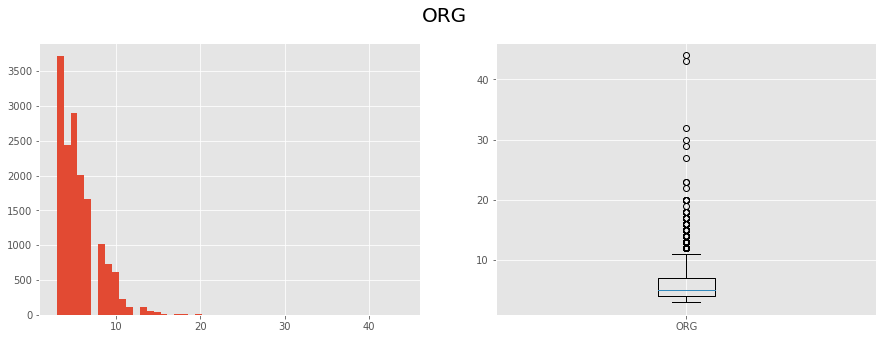

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('ORG', fontsize=20)

ax[0].hist([len(s) for s in org.to_list()], bins=50)
ax[1].boxplot([len(s) for s in org.to_list()])
ax[1].set_xticklabels(['ORG'])
plt.show()

In [44]:


def outliers_iqr(series):
    series_len = pd.Series(map(len, series))
    q1, q3 = series_len.quantile([0.25, 0.75])
    iqr = q3 - q1

    lower_whis = q1 - (iqr * 1.5)
    upper_whis = q3 + (iqr * 1.5)
    return series.iloc[series_len[(series_len > upper_whis) | (series_len < lower_whis)].index]

In [45]:
outliers_iqr(org)

123      툰-운트 스포트버라인 바이어 04 레버쿠젠
159               후쿠오카 소프트뱅크 호크스
170                 레알 마드리드 카스티야
178               캐나디안 로코모티브 컴퍼니
180                 브리지워터 어소시에이츠
                  ...           
32047               도쿄 야쿠르트 스왈로스
32138               반민족행위특별조사위원회
32400            레가 프로 세콘다 디비시오네
32419               필라델피아 세븐티식서스
32458              스티어 프라이데이 나이트
Name: subject_entity, Length: 349, dtype: object

In [49]:
columns = ['subject_entity', 'subject_type', 'object_entity', 'object_type', 'label']

In [50]:
df_split.loc[outliers_iqr(org).index, columns]

,subject_entity,subject_type,object_entity,object_type,label
123,툰-운트 스포트버라인 바이어 04 레버쿠젠,ORG,1904년 7월 1일,DAT,org:founded
159,후쿠오카 소프트뱅크 호크스,ORG,2008,DAT,no_relation
170,레알 마드리드 카스티야,ORG,세군다 디비시온 B,POH,no_relation
178,캐나디안 로코모티브 컴퍼니,ORG,캐나다,LOC,org:place_of_headquarters
180,브리지워터 어소시에이츠,ORG,레이 달리오,PER,org:top_members/employees
...,...,...,...,...,...
32047,도쿄 야쿠르트 스왈로스,ORG,센트럴 리그,POH,org:member_of
32138,반민족행위특별조사위원회,ORG,반민특위,ORG,org:alternate_names
32400,레가 프로 세콘다 디비시오네,ORG,세리에 D,POH,no_relation
32419,필라델피아 세븐티식서스,ORG,NBA,ORG,org:member_of


<br><br>

#### **PER : 사람**

In [51]:
# PER : 사람
per = df_split.loc[df_split['subject_type'] == 'PER', 'subject_entity']
per

7              박용오
9              안규백
10       하비에르 파스토레
11         빌리 아일리시
14           미켈란젤로
           ...    
32462          방승환
32463       루이 14세
32464          이창진
32465          유기준
32466          최시형
Name: subject_entity, Length: 16783, dtype: object

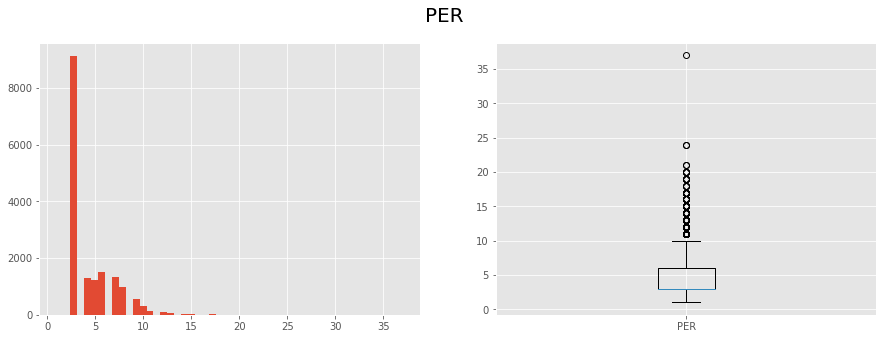

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('PER', fontsize=20)

ax[0].hist([len(s) for s in per.to_list()], bins=50)
ax[1].boxplot([len(s) for s in per.to_list()])
ax[1].set_xticklabels(['PER'])
plt.show()

In [53]:
outliers_iqr(per)

333      블라디미르 게레로 주니어
474       페넬로페 크루스 산체스
551       스텔리오스 얀나코풀로스
556        프랭크 로이드 라이트
571        베르트 판 마르바이크
             ...      
31869      카를로 마리아 줄리니
32061     비토리오 아메데오 2세
32170    아부 마흐디 알 무한디스
32251    드와이트 D. 아이젠하워
32324      Mr.Children
Name: subject_entity, Length: 428, dtype: object

In [54]:
df_split.loc[outliers_iqr(per).index, columns]

,subject_entity,subject_type,object_entity,object_type,label
333,블라디미르 게레로 주니어,PER,1999년 3월 16일,DAT,per:date_of_birth
474,페넬로페 크루스 산체스,PER,1974년 4월 28일,DAT,per:date_of_birth
551,스텔리오스 얀나코풀로스,PER,그리스,ORG,per:origin
556,프랭크 로이드 라이트,PER,건축가,POH,per:title
571,베르트 판 마르바이크,PER,네덜란드,ORG,per:employee_of
...,...,...,...,...,...
31869,카를로 마리아 줄리니,PER,지휘자,POH,no_relation
32061,비토리오 아메데오 2세,PER,오를레앙의 안나 마리아,LOC,per:spouse
32170,아부 마흐디 알 무한디스,PER,이라크,LOC,per:origin
32251,드와이트 D. 아이젠하워,PER,미국 육군,LOC,per:employee_of


<br><br>

#### **DAT : 날짜**

In [128]:
# DAT : 날짜
dat = df_split.loc[df_split['object_type'] == 'DAT', 'object_entity']
dat[:5]

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_17916\1421186813.py:3: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  dat[:5]


4              1967
6              1989
7      1937년 4월 29일
14             르네상스
45    1800년 ~ 1862년
Name: object_entity, dtype: object

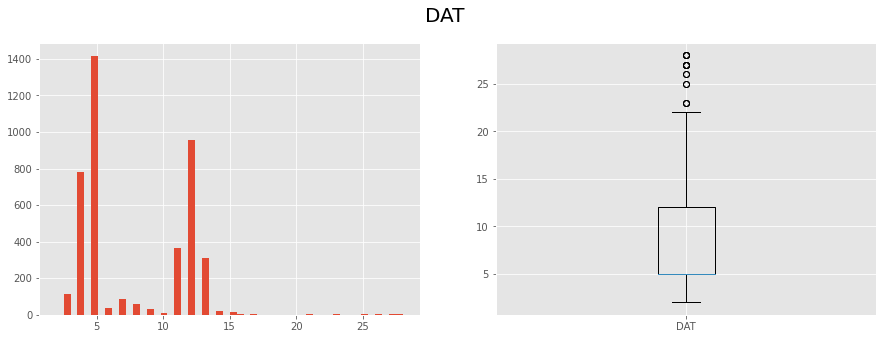

In [129]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('DAT', fontsize=20)

ax[0].hist([len(s) for s in dat.to_list()], bins=50)
ax[1].boxplot([len(s) for s in dat.to_list()])
ax[1].set_xticklabels(['DAT'])
plt.show()

In [130]:
outliers_iqr(dat)

457       1915년 9월 9일 ~ 1958년 11월 19일
2280        1854년 1월 12일-1920년 1월 11일
2446     1880년 11월 28일 ~ 1960년 2월 10일
6678      1918년 6월 13일 - 1944년 10월 7일
8284     1912년 10월 24일 – 1988년 11월 4일
8809       1770년 5월 10일 ~ 1823년 6월 1일
8980      1768년 12월 7일 - 1855년 5월 26일
10227       1899년 6월 1일 ~ 1968년 4월 1일
12039     1862년 1월 19일 ~ 1933년 10월 7일
13193     1909년 8월 12일 ~ 1935년 1월 23일
20683         579년 8월 24일 (음력 7월 17일)
21143    1908년 6월 21일 ~ 1932년 12월 19일
23634         1559년 - 1592년 음력 4월 28일
28718         2017년 영화 '내 마음 깊은 곳의 너'
31653      1937년 7월 6일 ~ 2016년 1월 25일
31670    1931년 4월 14일 ~ 1931년 12월 13일
Name: object_entity, dtype: object

In [131]:
df_split.loc[outliers_iqr(dat).index, columns]

,subject_entity,subject_type,object_entity,object_type,label
457,류경수,PER,1915년 9월 9일 ~ 1958년 11월 19일,DAT,per:date_of_birth
2280,가타오카 시치로,PER,1854년 1월 12일-1920년 1월 11일,DAT,per:date_of_birth
2446,박두영,PER,1880년 11월 28일 ~ 1960년 2월 10일,DAT,no_relation
6678,헬무트 렌트,PER,1918년 6월 13일 - 1944년 10월 7일,DAT,no_relation
8284,헤르만 그라프,PER,1912년 10월 24일 – 1988년 11월 4일,DAT,no_relation
8809,루이 니콜라 다부,PER,1770년 5월 10일 ~ 1823년 6월 1일,DAT,no_relation
8980,장 이시도르 아리스프,PER,1768년 12월 7일 - 1855년 5월 26일,DAT,no_relation
10227,노덕술,PER,1899년 6월 1일 ~ 1968년 4월 1일,DAT,per:date_of_birth
12039,한창수,PER,1862년 1월 19일 ~ 1933년 10월 7일,DAT,per:date_of_birth
13193,최용신,PER,1909년 8월 12일 ~ 1935년 1월 23일,DAT,per:date_of_birth


<br><br>

#### **LOC : 장소 / 위치**

In [64]:
# LOC : 장소 / 위치
location = df_split.loc[df_split['object_type'] == 'LOC', 'object_entity']
location.loc[:5]

Series([], Name: object_entity, dtype: object)

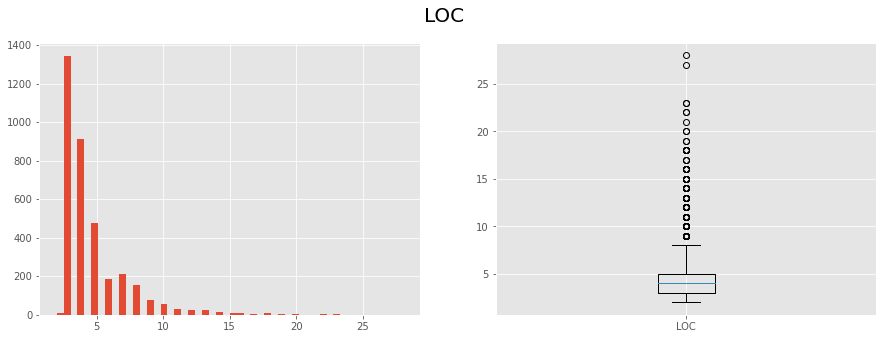

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('LOC', fontsize=20)

ax[0].hist([len(s) for s in location.to_list()], bins=50)
ax[1].boxplot([len(s) for s in location.to_list()])
ax[1].set_xticklabels(['LOC'])
plt.show()

In [66]:
outliers_iqr(location)

91          조선 충청도 공주
129       조선민주주의인민공화국
134        스코틀랜드 에든버러
702         오리건주 포틀랜드
797       광주광역시 행정부시장
             ...     
31812       폴란드-리투아니아
32061    오를레앙의 안나 마리아
32099       유고슬라비아로부터
32221       일리노이주 시카고
32423       아시리아 군사회의
Name: object_entity, Length: 267, dtype: object

In [67]:
df_split.loc[outliers_iqr(location).index, columns]

,subject_entity,subject_type,object_entity,object_type,label
91,백한성,PER,조선 충청도 공주,LOC,per:place_of_birth
129,조선중앙통신사,ORG,조선민주주의인민공화국,LOC,org:place_of_headquarters
134,에든버러 대학교,ORG,스코틀랜드 에든버러,LOC,org:place_of_headquarters
702,리드 칼리지,ORG,오리건주 포틀랜드,LOC,org:place_of_headquarters
797,정종제,PER,광주광역시 행정부시장,LOC,per:title
...,...,...,...,...,...
31812,폴란드 왕국,ORG,폴란드-리투아니아,LOC,no_relation
32061,비토리오 아메데오 2세,PER,오를레앙의 안나 마리아,LOC,per:spouse
32099,보스니아 헤르체고비나,ORG,유고슬라비아로부터,LOC,no_relation
32221,메트라,ORG,일리노이주 시카고,LOC,org:place_of_headquarters


<br><br>

#### **POH : 고유명사 / 명사**

In [70]:
# POH : 고유명사 / 명사
poh = df_split.loc[df_split['object_type'] == 'POH', 'object_entity']
poh

11                  싱어송라이터
24                     1루수
30        Voice of America
38                     국악인
41                     만화가
               ...        
32444                 K리그1
32446           서울시립과학관 관장
32458    Stir Friday Night
32462                  공격수
32464                  외야수
Name: object_entity, Length: 5113, dtype: object

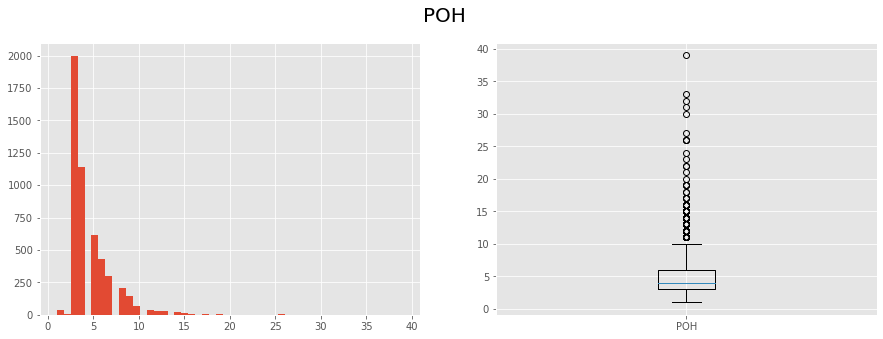

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('POH', fontsize=20)

ax[0].hist([len(s) for s in poh.to_list()], bins=50)
ax[1].boxplot([len(s) for s in poh.to_list()])
ax[1].set_xticklabels(['POH'])
plt.show()

In [72]:
outliers_iqr(poh)

30        Voice of America
151            2009년 한국시리즈
161          광주광역시 문화경제부시장
393          사회부총리 겸 교육부장관
903           우리들의 일그러진 영웅
               ...        
31716          조선민주주의인민공화국
32036          서울종합운동장 야구장
32197          오페라 극장 살인사건
32218          라이언스(Lions)
32458    Stir Friday Night
Name: object_entity, Length: 164, dtype: object

In [73]:
df_split.loc[outliers_iqr(poh).index, columns]

,subject_entity,subject_type,object_entity,object_type,label
30,미국의 소리,ORG,Voice of America,POH,org:alternate_names
151,KIA 타이거즈,ORG,2009년 한국시리즈,POH,org:member_of
161,조인철,PER,광주광역시 문화경제부시장,POH,per:title
393,유은혜,PER,사회부총리 겸 교육부장관,POH,per:title
903,이문열,PER,우리들의 일그러진 영웅,POH,per:product
...,...,...,...,...,...
31716,장성택,PER,조선민주주의인민공화국,POH,per:origin
32036,LG 트윈스,ORG,서울종합운동장 야구장,POH,no_relation
32197,김전일,PER,오페라 극장 살인사건,POH,no_relation
32218,뱅가드 대학교,ORG,라이언스(Lions),POH,org:members


<br><br>

#### **NOH : 숫자 표현**

In [76]:
# NOH : 숫자 표현
noh = df_split.loc[df_split['object_type'] == 'NOH', 'object_entity']
noh

72               49만 
107      031-909-9000
109              48kg
192               18팀
194              500만
             ...     
32303        홋카이도 제1구
32329             13개
32356             12개
32448             14개
32457           1100대
Name: object_entity, Length: 392, dtype: object

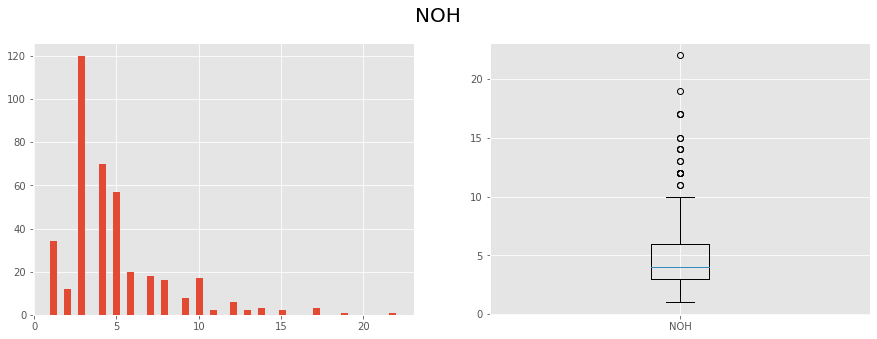

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

fig.suptitle('NOH', fontsize=20)

ax[0].hist([len(s) for s in noh.to_list()], bins=50)
ax[1].boxplot([len(s) for s in noh.to_list()])
ax[1].set_xticklabels(['NOH'])
plt.show()

In [78]:
outliers_iqr(noh)

107                031-909-9000
663              KBS 24기 공채 개그맨
977                 16·17·18·20
1053               031-909-9000
3158            1. FFC 투르비네 포츠담
5143          031-888-8601~8602
7910               제20·21대 국회의원
9756            제15·16·17대 국회의원
10249         조선인민군 지상군 제4군단사령관
11193             031-8075-4488
14869              061-286-2452
20742    메이레키 원년(1655년 12월 17일)
21009               15·16·18·19
22658         1읍 9면 10행정동 18법정동
23800       서울특별시 영등포구 여의대로 128
25780            1. FC 카이저슬라우테른
26377             1. FSV 마인츠 05
26867            KBS 16기 공채 탤런트
29035              대원방송 성우극회 1기
29414              031-909-9000
Name: object_entity, dtype: object

In [80]:
df_split.loc[outliers_iqr(noh).index, columns]

,subject_entity,subject_type,object_entity,object_type,label
107,고양시,ORG,031-909-9000,NOH,no_relation
663,안소미,PER,KBS 24기 공채 개그맨,NOH,per:title
977,정진석,PER,16·17·18·20,NOH,no_relation
1053,고양시,ORG,031-909-9000,NOH,no_relation
3158,파트미레 알루시,PER,1. FFC 투르비네 포츠담,NOH,per:employee_of
5143,경기도경제과학진흥원 창업지원팀,ORG,031-888-8601~8602,NOH,no_relation
7910,정운천,PER,제20·21대 국회의원,NOH,no_relation
9756,김홍일,PER,제15·16·17대 국회의원,NOH,per:title
10249,변인선,PER,조선인민군 지상군 제4군단사령관,NOH,per:title
11193,고양시상하수도사업소 당직실,ORG,031-8075-4488,NOH,no_relation
